In [40]:
# proteinGroups.txt 전처리 구문
# v0: proteinGroups.txt 로드 후, contam, reverse, only ident 필터링
# v1.0: 선택 column제외 필터링 + ';'으로 구분된 데이터 요소 split

# 패키지 불러오기
import pandas as pd
from time import localtime, strftime

global txtpath
txtpath = 'E:/HFX-DATA/Searched/20220616_DU145_Global_100ng_60min_7-28%_1/combined/txt/proteinGroups.txt'

class op_address:
    def __init__(self, vers):
        self.vers = vers
        
    def pg_address(self):
        address = '/outputs/'+txtpath[21:62]+'_proteinGroups_v'+str(self.vers)+'.txt'
        return address

    def pep_address(self):
        address = '/outputs/'+txtpath[21:62]+'_peptides_v'+str(self.vers)+'.txt'
        return address


# proteinGroups.txt 로드.
# ./RawData/TextFiles 경로에 proteinGroups.txt 위치해야.
df = pd.read_table(filepath_or_buffer=txtpath)
len0 = len(df)


# version 0 : Filtered [Potential contaminants], [Reverse], [Only identified by site]
df.drop(df[df['Potential contaminant'] == '+'].index, inplace = True)
len_contam = len0 - len(df)
print('message! >>> '+str(len_contam)+' Potential contaminant elements are dropped')

df.drop(df[df['Reverse'] == '+'].index, inplace = True)
len_rev = len0-len_contam-len(df)
print('message! >>> '+str(len_rev)+' reverse elements are dropped')

df.drop(df[df['Only identified by site'] == '+'].index, inplace = True)
len_osite = len0-len_contam-len_rev-len(df)
print('message! >>> '+str(len_osite)+' reverse elements are dropped')

df.drop(columns=['Only identified by site', 'Reverse', 'Potential contaminant'], inplace=True)
print('message! >>> 3 columns are dropped: [Only identified by site], [Reverse], [Potential contaminant]')

# Generate file: version 0
v = op_address(0)
df.to_csv(path_or_buf='.'+v.pg_address(), sep='\t', index=False, encoding='utf-8')
print('message! >>> '+'.'+v.pg_address()+' added.')


# 남겨놓을 column label 제외 필터링.
column_names = list(df)
rest = {'Protein IDs', 'Peptide counts (razor+unique)', 'Protein names', 'Gene names', 'Number of proteins',
        'Razor + unique peptides', 'Unique sequence coverage [%]', 'Sequence lengths' ,'Score', 'Intensity',
        'MS/MS count', 'id', 'Best MS/MS'}
filt = [ele for ele in column_names if ele not in rest]
df.drop(columns=filt, inplace=True)

print('message! >>> Dropped '+str(len(filt))+' columns\n')


# version 1.0 : ';'으로 구분된 데이터 요소 split후 첫 요소로 값 교체.
# (1) Protein IDs
prot = pd.Series(df["Protein IDs"])
for ele in prot:
    tmp = ele.split(';')[0]
    prot.replace(ele, tmp, inplace=True)
print('message! >>> Protein IDs splited')

# (2) Best MS/MS
bmsms = pd.Series(df["Best MS/MS"])
for ele in bmsms:
    tmp = ele.split(';')[0]
    bmsms.replace(ele, tmp, inplace=True)
print('message! >>> Best Ms/MS splited')

# index 넘버링 초기화
df.reset_index(drop=True, inplace=True)

# Generate file: version 1
v = op_address(1)
df.to_csv(path_or_buf='.'+v.pg_address(), sep='\t', index=False, encoding='utf-8')
print('message! >>> '+'.'+v.pg_address()+' added.')

df.info()

message! >>> 10 Potential contaminant elements are dropped
message! >>> 12 reverse elements are dropped
message! >>> 0 reverse elements are dropped
message! >>> 3 columns are dropped: [Only identified by site], [Reverse], [Potential contaminant]
message! >>> ./outputs/20220616_DU145_Global_100ng_60min_7-28%_1_proteinGroups_v0.txt added.
message! >>> Dropped 18 columns

message! >>> Protein IDs splited
message! >>> Best Ms/MS splited
message! >>> ./outputs/20220616_DU145_Global_100ng_60min_7-28%_1_proteinGroups_v1.txt added.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Protein IDs                    1245 non-null   object 
 1   Peptide counts (razor+unique)  1245 non-null   object 
 2   Protein names                  1242 non-null   object 
 3   Gene names                     1242 non-null   object 
 4 

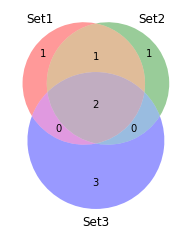

In [41]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Example
set1 = set(['A', 'B', 'C', 'D'])
set2 = set(['B', 'C', 'D', 'E'])
set3 = set(['C', 'D',' E', 'F', 'G'])

venn3([set1, set2, set3], ('Set1', 'Set2', 'Set3'))
plt.show()

In [45]:
len(prot)

1245

In [51]:
# conda install -c conda-forge matplotlib-venn

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3


# N = 3
path1 = './outputs/20220616_DU145_Global_100ng_60min_7-28%_1_proteinGroups_v1.txt'
path2 = './outputs/20220616_DU145_Global_100ng_60min_7-28%_2_proteinGroups_v1.txt'
path3 = './outputs/20220616_DU145_Global_100ng_60min_7-28%_3_proteinGroups_v1.txt'


# set: 집합 선언
df1 = pd.read_table(filepath_or_buffer=path1)
set1 = set(pd.Series(df1["Protein IDs"]))
print('Set1 has '+str(len(set1))+' elements')

df2 = pd.read_table(filepath_or_buffer=path2)
set2 = set(pd.Series(df2["Protein IDs"]))
print('Set2 has '+str(len(set2))+' elements')

df3 = pd.read_table(filepath_or_buffer=path3)
set3 = set(pd.Series(df3["Protein IDs"]))
print('Set3 has '+str(len(set3))+' elements')

Set1 has 1245 elements
Set2 has 1311 elements
Set3 has 1289 elements


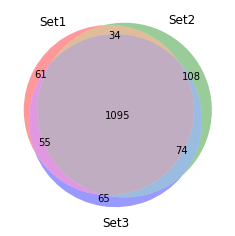

In [52]:
# Visualization
venn3([set1, set2, set3], ('Set1', 'Set2', 'Set3'))
plt.show()

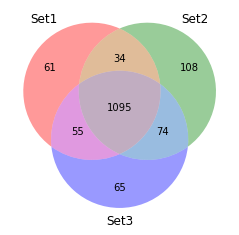

In [53]:
from matplotlib_venn import venn3_unweighted
venn3_unweighted([set1, set2, set3], ('Set1', 'Set2', 'Set3'))
plt.show()